In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

     |████████████████████████████████| 10.1MB 5.6MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=9efa7b1f37057fc121e0639e39c095504cb3570ad163c1d583c242ca8e628b05
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
     |████████████████████████████████| 983kB 4.3MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=9a9545fa7e5302f7a37fb206a4f8329650dc7b0954cc0bcf349e3a869c7338b4
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Authentication
consumerKey = "TOQQWA6qH9dNKWJ2aIBNUacd3"
consumerSecret = "qsNTNlp20bCSe8sAwW3vdMkxKDgGs2SIhFf9t2Sr5juerIFWpF"
accessToken = "1131902371938750465-ElmXiQ6JBP1APEDf70c4en02P3XYlQ"
accessTokenSecret = "xzVT0HUgZs2Oxf2ctLPRRMPG2NUuGuEeJ82MpO6Gow1vC"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: UCL
Please enter how many tweets to analyze: 100


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  18
negative number:  21
neutral number:  61


In [7]:
tweet_list

,0
0,Auf den Punkt gebracht! #UCL https://t.co/KGNu...
1,RT @ChampionsLeague: 🔴 Cristiano Ronaldo in un...
2,RT @dr_shibley: @BMJLeader @HelenBevanTweet @g...
3,RT @ChampionsLeague: 🇧🇷 2010 winner Júlio Césa...
4,RT @OhItsSteely: Dominated in a decade without...
...,...
95,RT @UEFAcom_it: ⭐ Alessandro #DelPiero ⚪⚫\n\n🎯...
96,RT @ChampionsLeague: 🔴 Who's your Bayern hero?...
97,RT @ChampionsLeague: 💙 John Terry 💙\n\n👕 22 ye...
98,RT @ChampionsLeague: 🔴 Cristiano Ronaldo in un...


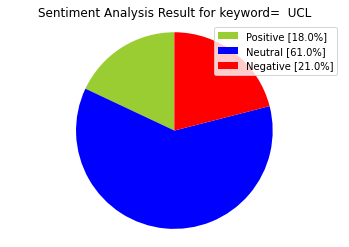

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Auf den Punkt gebracht! #UCL https://t.co/KGNu...,Auf den Punkt gebracht! #UCL https://t.co/KGNu...
1,RT @ChampionsLeague: 🔴 Cristiano Ronaldo in un...,RT @ChampionsLeague: 🔴 Cristiano Ronaldo in un...
2,RT @dr_shibley: @BMJLeader @HelenBevanTweet @g...,RT @dr_shibley: @BMJLeader @HelenBevanTweet @g...
3,RT @ChampionsLeague: 🇧🇷 2010 winner Júlio Césa...,RT @ChampionsLeague: 🇧🇷 2010 winner Júlio Césa...
4,RT @OhItsSteely: Dominated in a decade without...,RT @OhItsSteely: Dominated in a decade without...
5,RT @ChampionsLeague: 👀 Caption this!\n\n🔴 Sala...,RT @ChampionsLeague: 👀 Caption this!\n\n🔴 Sala...
6,RT @ChampionsLeague: 🔵🔴 Throwback to an iconic...,RT @ChampionsLeague: 🔵🔴 Throwback to an iconic...
7,RT @City_Chief: #ManCity have earned the most ...,RT @City_Chief: #ManCity have earned the most ...
10,RT @Laxix6: I can’t wait to see how these boys...,RT @Laxix6: I can’t wait to see how these boys...
12,RT @ChampionsLeague: 🇧🇷 Pick one Brazilian bal...,RT @ChampionsLeague: 🇧🇷 Pick one Brazilian bal...


In [11]:
tweet_list

,0,text
0,Auf den Punkt gebracht! #UCL https://t.co/KGNu...,Auf den Punkt gebracht! #UCL https://t.co/KGNu...
1,RT @ChampionsLeague: 🔴 Cristiano Ronaldo in un...,RT @ChampionsLeague: 🔴 Cristiano Ronaldo in un...
2,RT @dr_shibley: @BMJLeader @HelenBevanTweet @g...,RT @dr_shibley: @BMJLeader @HelenBevanTweet @g...
3,RT @ChampionsLeague: 🇧🇷 2010 winner Júlio Césa...,RT @ChampionsLeague: 🇧🇷 2010 winner Júlio Césa...
4,RT @OhItsSteely: Dominated in a decade without...,RT @OhItsSteely: Dominated in a decade without...
5,RT @ChampionsLeague: 👀 Caption this!\n\n🔴 Sala...,RT @ChampionsLeague: 👀 Caption this!\n\n🔴 Sala...
6,RT @ChampionsLeague: 🔵🔴 Throwback to an iconic...,RT @ChampionsLeague: 🔵🔴 Throwback to an iconic...
7,RT @City_Chief: #ManCity have earned the most ...,RT @City_Chief: #ManCity have earned the most ...
10,RT @Laxix6: I can’t wait to see how these boys...,RT @Laxix6: I can’t wait to see how these boys...
12,RT @ChampionsLeague: 🇧🇷 Pick one Brazilian bal...,RT @ChampionsLeague: 🇧🇷 Pick one Brazilian bal...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Auf den Punkt gebracht! #UCL https://t.co/KGNu...,auf den punkt gebracht ucl
1,RT @ChampionsLeague: 🔴 Cristiano Ronaldo in un...,cristiano ronaldo in unstoppable form in 20...
2,RT @dr_shibley: @BMJLeader @HelenBevanTweet @g...,berendt
3,RT @ChampionsLeague: 🇧🇷 2010 winner Júlio Césa...,2010 winner j lio c sar kept 22 clean shee...
4,RT @OhItsSteely: Dominated in a decade without...,dominated in a decade without any competition...
5,RT @ChampionsLeague: 👀 Caption this!\n\n🔴 Sala...,caption this salah amp thiago alc nta...
6,RT @ChampionsLeague: 🔵🔴 Throwback to an iconic...,throwback to an iconic leo messi semi fina...
7,RT @City_Chief: #ManCity have earned the most ...,mancity have earned the most in the ucl thi...
10,RT @Laxix6: I can’t wait to see how these boys...,i can t wait to see how these boys will perfo...
12,RT @ChampionsLeague: 🇧🇷 Pick one Brazilian bal...,pick one brazilian baller 1 ronaldo 2...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Auf den Punkt gebracht! #UCL https://t.co/KGNu...,auf den punkt gebracht ucl,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @ChampionsLeague: 🔴 Cristiano Ronaldo in un...,cristiano ronaldo in unstoppable form in 20...,0.000000,1.000000,negative,0.141,0.859,0.000,-0.2023
2,RT @dr_shibley: @BMJLeader @HelenBevanTweet @g...,berendt,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @ChampionsLeague: 🇧🇷 2010 winner Júlio Césa...,2010 winner j lio c sar kept 22 clean shee...,0.366667,0.700000,positive,0.000,0.586,0.414,0.8720
4,RT @OhItsSteely: Dominated in a decade without...,dominated in a decade without any competition...,0.083333,0.166667,neutral,0.000,1.000,0.000,0.0000
5,RT @ChampionsLeague: 👀 Caption this!\n\n🔴 Sala...,caption this salah amp thiago alc nta...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,RT @ChampionsLeague: 🔵🔴 Throwback to an iconic...,throwback to an iconic leo messi semi fina...,0.250000,0.750000,neutral,0.000,1.000,0.000,0.0000
7,RT @City_Chief: #ManCity have earned the most ...,mancity have earned the most in the ucl thi...,0.187500,0.437500,neutral,0.000,1.000,0.000,0.0000
10,RT @Laxix6: I can’t wait to see how these boys...,i can t wait to see how these boys will perfo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
12,RT @ChampionsLeague: 🇧🇷 Pick one Brazilian bal...,pick one brazilian baller 1 ronaldo 2...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,31,59.62
positive,16,30.77
negative,5,9.62


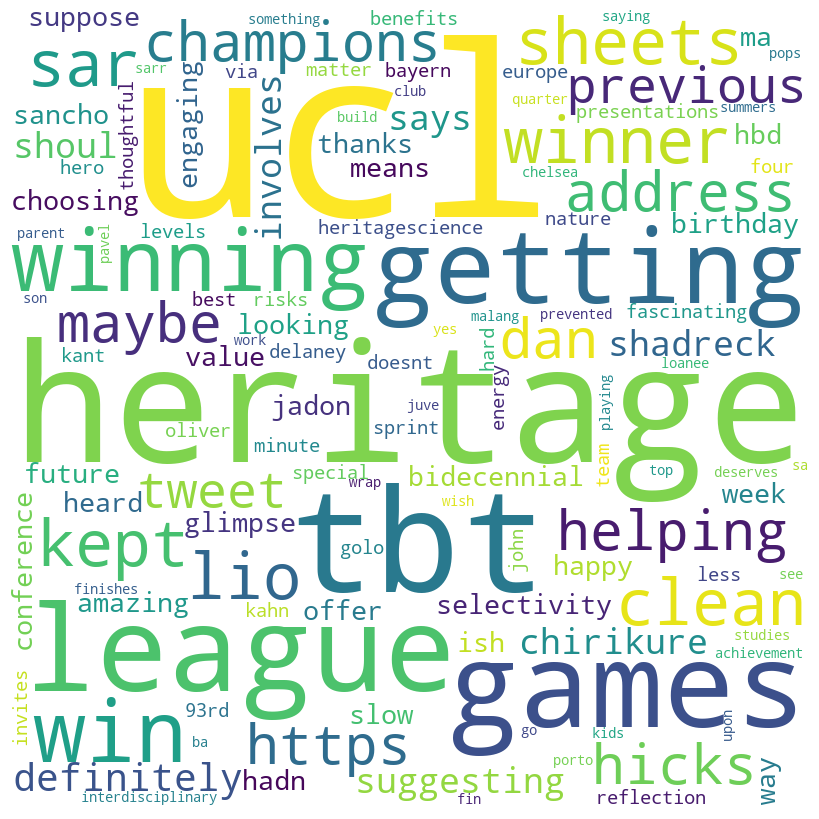

In [17]:
#Function to Create Wordcloud
comment_words = ''
stopwords = set(STOPWORDS)
for val in tw_list_positive.text:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

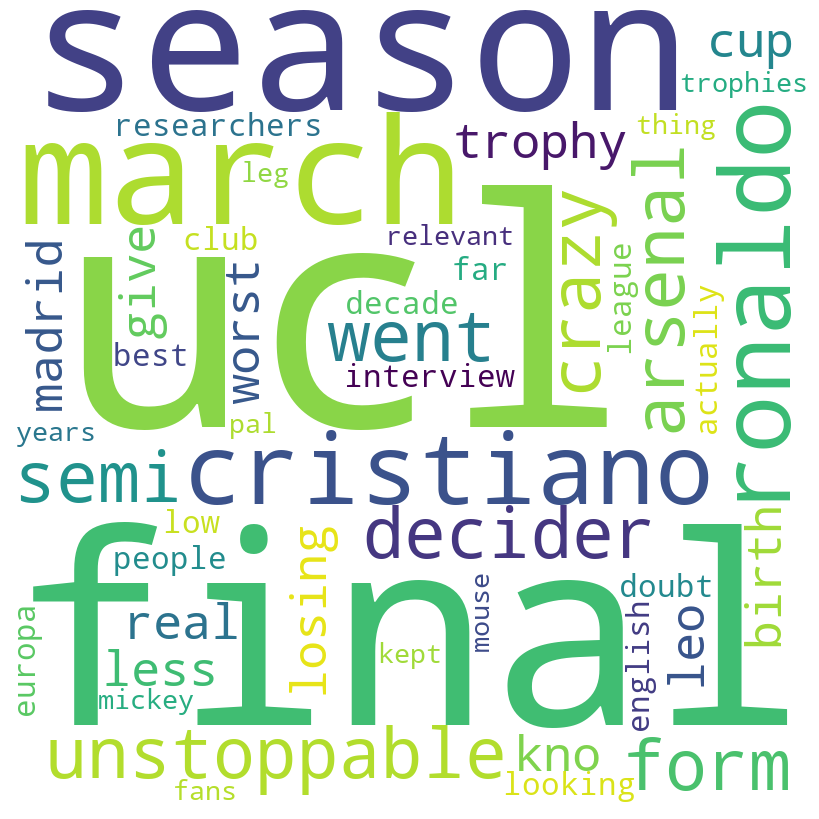

In [18]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in tw_list_negative.text:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

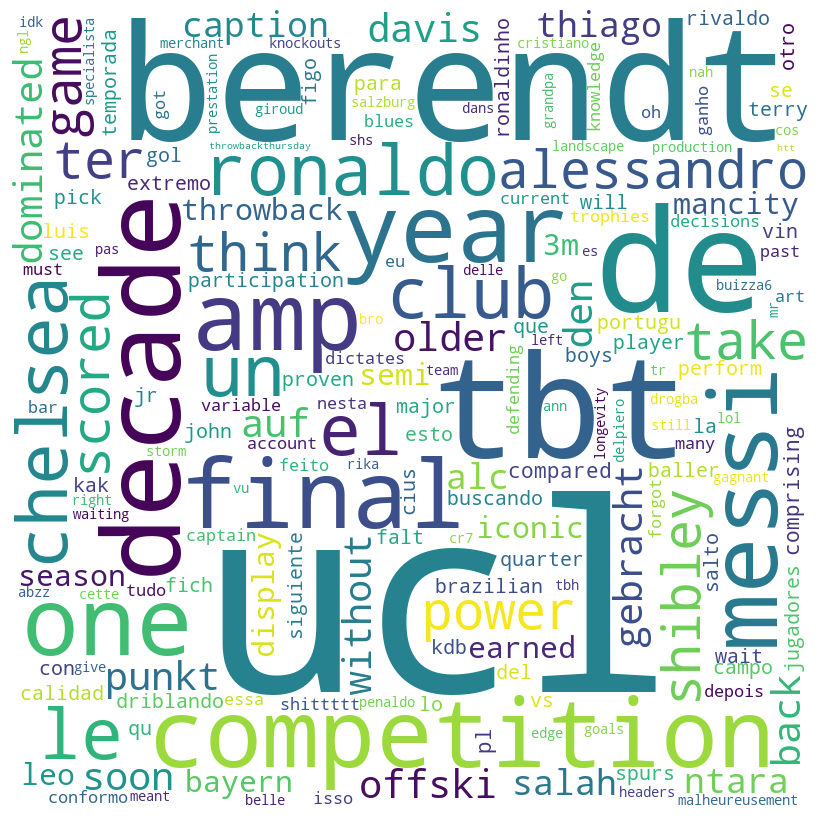

In [19]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in tw_list_neutral.text:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [20]:
#Calculating tweet's length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [21]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,110.40
neutral,71.16
positive,93.12


In [22]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.40
neutral,11.87
positive,15.75


In [23]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [24]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [25]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [26]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [27]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,Auf den Punkt gebracht! #UCL https://t.co/KGNu...,auf den punkt gebracht ucl,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,30,5,auf den punkt gebracht ucl,"[auf, den, punkt, gebracht, ucl, ]","[auf, den, punkt, gebracht, ucl, ]","[auf, den, punkt, gebracht, ucl, ]"
1,RT @ChampionsLeague: 🔴 Cristiano Ronaldo in un...,cristiano ronaldo in unstoppable form in 20...,0.000000,1.000000,negative,0.141,0.859,0.000,-0.2023,105,13,cristiano ronaldo in unstoppable form in s...,"[, cristiano, ronaldo, in, unstoppable, form, ...","[, cristiano, ronaldo, unstoppable, form, semi...","[, cristiano, ronaldo, unstopp, form, semi, fi..."
2,RT @dr_shibley: @BMJLeader @HelenBevanTweet @g...,berendt,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,29,1,berendt,"[, berendt, ]","[, berendt, ]","[, berendt, ]"
3,RT @ChampionsLeague: 🇧🇷 2010 winner Júlio Césa...,2010 winner j lio c sar kept 22 clean shee...,0.366667,0.700000,positive,0.000,0.586,0.414,0.8720,109,19,winner j lio c sar kept clean sheets in ...,"[, winner, j, lio, c, sar, kept, clean, sheets...","[, winner, j, lio, c, sar, kept, clean, sheets...","[, winner, j, lio, c, sar, kept, clean, sheet,..."
4,RT @OhItsSteely: Dominated in a decade without...,dominated in a decade without any competition...,0.083333,0.166667,neutral,0.000,1.000,0.000,0.0000,124,23,dominated in a decade without any competition...,"[, dominated, in, a, decade, without, any, com...","[, dominated, decade, without, competition, so...","[, domin, decad, without, competit, soon, comp..."
